<a href="https://colab.research.google.com/github/DanielBrisch/RedeNeural-ValorDoOuro/blob/main/Rede_neural_Valor_do_ouro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilização de Redes Neurais Recorrentes - Preço do Ouro


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import yfinance as yf

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## Importando os dados da tabela


In [ ]:
df = yf.download('GC=F', start='2000-01-01', end='2023-04-30')
df= df.dropna()
Gold_set = df.iloc[:, 1:2].values

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...
2023-04-24,1981.300049,1989.800049,1977.400024,1989.099976,1989.099976,145
2023-04-25,1995.699951,1999.099976,1982.300049,1994.000000,1994.000000,306
2023-04-26,1997.800049,1998.800049,1985.599976,1985.699951,1985.699951,615


In [ ]:
df.iloc[:, 1:2]

,High
Date,
2000-08-30,273.899994
2000-08-31,278.299988
2000-09-01,277.000000
2000-09-05,275.799988
2000-09-06,274.200012
...,...
2023-04-24,1989.800049
2023-04-25,1999.099976
2023-04-26,1998.800049


## Dimensionamento dos dados

In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
Gold_set_scaled = sc.fit_transform(Gold_set)

## Criação de uma estrutura de dados com 20 timesteps e 1 um saída

In [ ]:
X_gold = []
y_gold = []
for i in range(20, len(Gold_set_scaled)):
    X_gold.append(Gold_set_scaled[i-20:i, 0])
    y_gold.append(Gold_set_scaled[i, 0])
X_gold, y_gold = np.array(X_gold), np.array(y_gold)

## Reshaping

In [ ]:
X_gold = np.reshape(X_gold, (X_gold.shape[0], X_gold.shape[1], 1))

In [ ]:
X_gold.shape[1], 1

(20, 1)

## Inicializa a RNA
### Um modelo sequencial é apropriado para um conjunto simples de camadas onde cada camada tem exatamente um tensor de entrada e um tensor de saída.

In [ ]:
regressor = Sequential()

## Adicionando a primeira camada LSTM (É uma arquitetura de rede neural recorrente) e alguma regularização de Dropout

### O intuito é reduzir o overfitting

### Dropout Ele consiste em aleatoriamente descartar algumas unidades (neurônios) durante o treinamento de cada época. Isso significa que cada unidade é mantida com uma certa probabilidade (normalmente 60%) e descartada com uma certa probabilidade (40%) -- Em nosso caso.


In [ ]:
regressor.add(LSTM(units = 70, return_sequences = True, input_shape = (X_gold.shape[1], 1)))
regressor.add(Dropout(0.4))

## Adicionando uma segunda camada de LSTM com Regularização Dropout

---



In [ ]:
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.4))

## Adicionando uma terceira camada de LSTM com Regularização Dropout


In [ ]:
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.4))

## Adicionando uma quarta camada de LSTM com Regularização Dropout

In [ ]:
regressor.add(LSTM(units = 70))
regressor.add(Dropout(0.4))

## Adicionando a camada de saída



In [ ]:
regressor.add(Dense(units = 1))

## Compilando RNA
### Utilizando a otimização ADAM: A otimização de Adam é um método de descida gradiente estocástico baseado na estimativa adaptativa de momentos de primeira e segunda ordem.

### A função loss é por meio da média dos quadrados



In [ ]:
regressor.compile(optimizer = 'Nadam', loss = 'mean_squared_error')

## Fitting da RNA para treinamento do set

In [ ]:
regressor.fit(X_gold, y_gold, epochs = 100, batch_size = 32)

Epoch 1/100
178/178 [==============================] - 40s 70ms/step - loss: 0.0129
Epoch 2/100
178/178 [==============================] - 11s 64ms/step - loss: 0.0045
Epoch 3/100
178/178 [==============================] - 10s 59ms/step - loss: 0.0040
Epoch 4/100
178/178 [==============================] - 11s 63ms/step - loss: 0.0037
Epoch 5/100
178/178 [==============================] - 11s 64ms/step - loss: 0.0034
Epoch 6/100
178/178 [==============================] - 12s 69ms/step - loss: 0.0030
Epoch 7/100
178/178 [==============================] - 11s 63ms/step - loss: 0.0028
Epoch 8/100
178/178 [==============================] - 12s 66ms/step - loss: 0.0027
Epoch 9/100
178/178 [==============================] - 11s 63ms/step - loss: 0.0025
Epoch 10/100
178/178 [==============================] - 11s 63ms/step - loss: 0.0022
Epoch 11/100
178/178 [==============================] - 12s 69ms/step - loss: 0.0022
Epoch 12/100
178/178 [==============================] - 10s 57ms/step - lo

## Obtendo o preço real

In [ ]:
dataset_test = yf.download('GC=F', start='2023-05-01', end='2023-05-31')
real_preco_acao = dataset_test.iloc[:, 1:2].values

[*********************100%***********************]  1 of 1 completed


## Previsão

In [ ]:
dataset_total = pd.concat((df['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(20, 40):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


## Visualizando

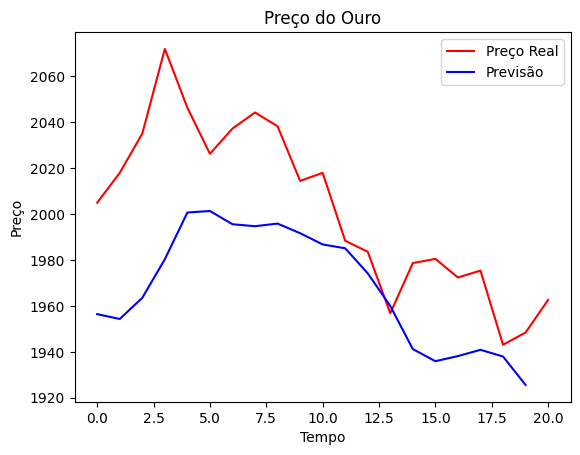

In [ ]:
plt.plot(real_preco_acao, color = 'red', label = 'Preço Real')
plt.plot(predicted_stock_price, color = 'blue', label = 'Previsão')
plt.title('Preço do Ouro')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.show()